## Projeto 1 - 

In [1]:
!pip install --upgrade pip

In [2]:
# !pip install pandas
# # !pip install csv
# !pip install git+https://github.com/hashiprobr/netpixi.git
# !pip install graph-tool-extras

In [3]:
# import graph_tool_extras as gte
import pandas as pd
import csv
import netpixi
import numpy as np

import graph_tool_extras as gte
from graph_tool import draw

In [4]:
df = pd.read_csv('imdb_movies.csv')
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [5]:
df['date_x'] = df['date_x'].str.strip().replace('', pd.NA)
df = df.dropna(subset=['date_x'])
df['date_x'] = pd.to_datetime(df['date_x'], format='%m/%d/%Y', errors='coerce')

In [6]:
df.dtypes

names                 object
date_x        datetime64[ns]
score                float64
genre                 object
overview              object
crew                  object
orig_title            object
status                object
orig_lang             object
budget_x             float64
revenue              float64
country               object
dtype: object

In [7]:
# df_filtered = df[df['date_x'].dt.year > 2020]
df_recente = pd.DataFrame()

# Pega linhas com ano DEPOIS de 2020 e nota MAIOR ou IGUAl a 70.0
for idx, row in df.iterrows():
    ano = row['date_x'].year
    score = row['score']
    # print(score > 70)
    if ano >= 2020 and score > 70.0:
        # print('   Entrou mesmo assim')
        df_recente = pd.concat([df_recente, row.to_frame().T], ignore_index=True)

# Apaga as linhas com valores NaN
df_recente.dropna(subset='names')
df_recente.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,2023-03-02 00:00:00,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,271616668.0,AU
1,Avatar: The Way of Water,2022-12-15 00:00:00,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2316794914.0,AU
2,The Super Mario Bros. Movie,2023-04-05 00:00:00,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,724459031.0,AU
3,John Wick: Chapter 4,2023-03-23 00:00:00,80.0,"Action, Thriller, Crime","With the price on his head ever increasing, Jo...","Keanu Reeves, John Wick, Donnie Yen, Caine, Bi...",John Wick: Chapter 4,Released,English,100000000.0,351349364.0,AU
4,Puss in Boots: The Last Wish,2022-12-26 00:00:00,83.0,"Animation, Family, Fantasy, Adventure, Comedy",Puss in Boots discovers that his passion for a...,"Antonio Banderas, Puss in Boots (voice), Salma...",Puss in Boots: The Last Wish,Released,English,90000000.0,483480577.0,AU


In [8]:
df_recente.head()

# Deleta duplicados (GRRRRRR)
df_recente.drop_duplicates(subset=['names'])

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,2023-03-02 00:00:00,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,271616668.0,AU
1,Avatar: The Way of Water,2022-12-15 00:00:00,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2316794914.0,AU
2,The Super Mario Bros. Movie,2023-04-05 00:00:00,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,724459031.0,AU
3,John Wick: Chapter 4,2023-03-23 00:00:00,80.0,"Action, Thriller, Crime","With the price on his head ever increasing, Jo...","Keanu Reeves, John Wick, Donnie Yen, Caine, Bi...",John Wick: Chapter 4,Released,English,100000000.0,351349364.0,AU
4,Puss in Boots: The Last Wish,2022-12-26 00:00:00,83.0,"Animation, Family, Fantasy, Adventure, Comedy",Puss in Boots discovers that his passion for a...,"Antonio Banderas, Puss in Boots (voice), Salma...",Puss in Boots: The Last Wish,Released,English,90000000.0,483480577.0,AU
...,...,...,...,...,...,...,...,...,...,...,...,...
688,Flee,2022-02-17 00:00:00,78.0,"Documentary, Animation",Recounted mostly through animation to tell a g...,"Amin Nawabi, Self (voice), Daniel Karimyar, Am...",Flugt,Released,Danish,3400000.0,440544.0,AU
689,The Secret to Be Told: Relationship With My Aunt,2020-07-06 00:00:00,73.0,"Drama, Romance",Minwoo falls in love with an aunt younger than...,"Yoo Jung, , Ahn So-hee, , James, , Kang Min-woo,",말할 수 없는 비밀 : 이모와의 관계,Released,Korean,58000000.0,626713614.8,KR
690,Dragons: Rescue Riders: Secrets of the Songwing,2020-07-24 00:00:00,78.0,"Animation, Family, TV Movie",When a musical dragon with a beautiful voice h...,"Noah Kaye Bentley, Burple (voice), Brennley Br...",Dragons: Rescue Riders: Secrets of the Songwing,Released,English,62000000.0,183866850.0,US
691,K.G.F: Chapter 2,2022-04-14 00:00:00,76.0,"Action, Crime, Drama",The blood-soaked land of Kolar Gold Fields (KG...,"Yash, Raja Krishnappa Bairya 'Rocky', Sanjay D...",ಕೆ.ಜಿ.ಎಫ್: Chapter 2,Released,Kannada,13000000.0,90410749.0,IN


In [9]:
df_recente.drop_duplicates(subset='names', inplace=True)
print(df_recente[df_recente.duplicated(subset='names', keep=False)])

Empty DataFrame
Columns: [names, date_x, score, genre, overview, crew, orig_title, status, orig_lang, budget_x, revenue, country]
Index: []


## Criando o Grafo

In [10]:
# Peguei essa logica da Aula 3, qualquer coisa da uma olhada
g = gte.Graph(directed=False) # igual a gte.Graph(), pois directed é falso por padrão

vertice_tipo = g.new_vertex_property("string")
g.vertex_properties["tipo"] = vertice_tipo

In [11]:
filmes = [g.add_vertex_by_id(nome) for nome in df_recente['names']]
for v in filmes:
    vertice_tipo[v] = "Filme"

In [12]:
# pos = gte.layout_bipartite(g, v_tipo)

# graph_draw(g, pos=pos, vertex_text=v_tipo, output_size=(400, 400), output="rede_bipartida.png")

In [13]:
# Criando o vertice de generos. Antes de fazer isso temos q separar os generos de cada filme, por exemplo: em um filme q tenha Drama, Action como generos, 
# temos q criar uma lista com os dois separados
generos = set()
genero = []
for genre in df_recente['genre']:
    # print([genre])
    for ga in genre.split(','):
        g_limpo = ga.strip()
        genero.append(g_limpo)
    generos.update(genero)

lista_generos = sorted(list(generos))

mat_zerada = np.zeros((len(lista_generos), len(lista_generos)))
matriz_gen = pd.DataFrame(mat_zerada, columns=lista_generos, index=lista_generos)

# matriz_gen
# for gen in generos:
#     v = g.add_vertex_by_id(gen)
#     vertice_tipo[v] = "Gênero"

In [14]:
from pprint import pprint

In [20]:
# Cria dicionario para salvar ocorrencias
conexoes_gen = {}
for g_prim in generos:
    conexoes_gen[g_prim] = { 'Total' : 0}
    for g_sec in generos:
        if g_sec != g_prim:
            conexoes_gen[g_prim][g_sec] = 0
            # print('Criou')
# pprint(conexoes_gen)
# Ocorrencias de apararecer juntas
for genres in df_recente['genre']:
    for ga in genres.split(','):
        ga = ga.strip()
        # print(f'GA: {ga}')
        for gb in genres.split(','):
            gb = gb.strip()
            if ga != gb:
                # print(f'    GB: {gb}')
                conexoes_gen[ga][gb] += 1
                conexoes_gen[ga]['Total'] += 1

# pprint(conexoes_gen)
percents = {}
# Porcentagem de aparição de cada filme em relação a outro
for genA in conexoes_gen:
    # r_genA = repr(genA)[1:-1]
    # print(f'GA: {genA}')
    # print(f'raw GA: {r_genA}')
    percents[genA] = {}
    for genB in conexoes_gen[genA]:
        # r_genB = repr(genB)[1:-1]
        # print(f'    GB: {genB}')
        # print(f'    raw GB: {r_genB}')
        if genB != 'Total':
            percents[genA][genB] = round(conexoes_gen[genA][genB] * 100 / conexoes_gen[genA]['Total'], 2)
            

pprint(percents)
# len(percents)

{'Action': {'Adventure': 14.76,
            'Animation': 14.46,
            'Comedy': 6.63,
            'Crime': 6.33,
            'Documentary': 0.0,
            'Drama': 12.05,
            'Family': 3.92,
            'Fantasy': 12.65,
            'History': 2.71,
            'Horror': 1.2,
            'Music': 0.0,
            'Mystery': 1.81,
            'Romance': 0.9,
            'Science Fiction': 10.54,
            'TV Movie': 1.2,
            'Thriller': 9.34,
            'War': 1.2,
            'Western': 0.3},
 'Adventure': {'Action': 14.08,
               'Animation': 19.83,
               'Comedy': 12.93,
               'Crime': 1.72,
               'Documentary': 0.0,
               'Drama': 6.03,
               'Family': 16.38,
               'Fantasy': 17.53,
               'History': 0.57,
               'Horror': 0.57,
               'Music': 0.57,
               'Mystery': 1.72,
               'Romance': 0.29,
               'Science Fiction': 5.46,
               'TV

In [16]:
import matplotlib.pyplot as plt

TypeError: unhashable type: 'dict'

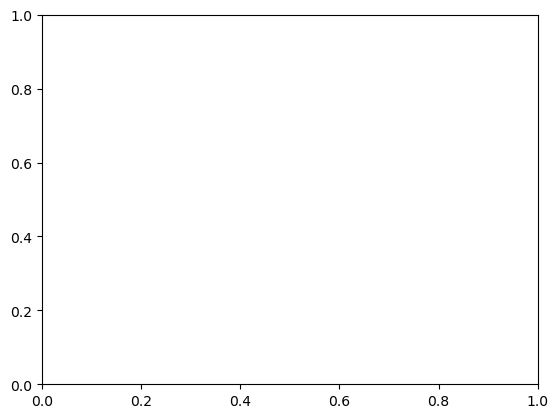

In [21]:
plt.plot(conexoes_gen['Action'])

In [ ]:
# Popular os dados de generos
for gen in df_recente['genre']:
    # print(gen)
    for ga in gen.split(','):
        # print(ga)
        ga_limpo = ga.strip()
        for gb in gen.split(','):
            gb_limpo = gb.strip()
            matriz_gen.loc[gb_limpo, ga_limpo] = 1

display(matriz_gen)

for gen_a in lista_generos:
    for gen_b in lista_generos:
        if gen_b != gen_a and matriz_gen.loc[gen_b, gen_a] == 1:
            # Adiciona a arresta se foram localizados juntos
            # print(f'Para {gen_a} e {gen_b}, achamos relacao!')
            if g.vertex_by_id(gen_a) is None:
                v = g.add_vertex_by_id(gen_a)
                # v_color[v] = "red"
                
            if g.vertex_by_id(gen_b) is None:
                v = g.add_vertex_by_id(gen_b)
                # v_color[v] = "red"
                
            g.add_edge_by_ids(gen_a, gen_b)

            # Para nao repetir criacao de aresta
            matriz_gen.loc[gen_b, gen_a] = 0
            matriz_gen.loc[gen_a, gen_b] = 0



In [ ]:
genero = []

for idx, row in df_recente.iterrows():
    filme = row['names']
    for ga in row['genre'].split(','):
        g_limpo = ga.strip()
        genero.append(g_limpo)
        g.add_edge_by_ids(filme, g_limpo)

In [ ]:
layout = draw.sfdp_layout(g)

gte.move(g, layout)

In [ ]:
print("Número de vértices:", g.num_vertices())
print("Número de arestas:", g.num_edges())

In [ ]:
gte.save(g, 'imdb.net.gz')

r = netpixi.render('imdb.net.gz');

In [ ]:
# r.vertex_default(
#     size=20,         # tamanho            (padrão: 16)
#     color=0xff0000,  # cor                (padrão: 0xffffff)
#     bwidth=4,        # espessura da borda (padrão: 2)
#     bcolor=0xff0f00, # cor da borda       (padrão: 0x3f3f3f)
# )

# r.edge_default(
#     width=2,        # espessura         (padrão: 2)
#     color=0x7777ff, # cor               (padrão: 0xffffff)
#     curve1=0,       # curvatura inicial (padrão: 0)
#     curve2=0,       # curvatura final   (padrão: 0)nalogamente, para atribuir características visuais às arestas, podemos chamanalogamente, para atribuir características visuais às arestas, podemos chama
# )
